In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import ipywidgets

from mplsoccer import Pitch, VerticalPitch

# Operações e gráficos básicos

## Lendo dados

In [2]:
data = pd.read_csv(f'data/players_22.csv')
data.head(5)

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_13124\244766356.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'data/players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


## Filtrando

In [3]:
psg = data.query("club_name == 'Paris Saint-Germain'")[['short_name', 'overall', 'age', 'club_position']]
#data.loc[data['club_name'] == 'Paris Saint-Germain', ['short_name', 'overall', 'age', 'club_position']]

psg.head(5)

,short_name,overall,age,club_position
0,L. Messi,93,34,RW
3,Neymar Jr,91,29,LW
6,K. Mbappé,91,22,ST
21,G. Donnarumma,89,22,GK
22,Sergio Ramos,88,35,LCB


## Primeiro gráfico!

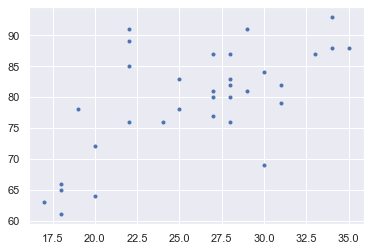

In [4]:
plt.plot(psg['age'], psg['overall'], '.');

## Agrupamento e mais gráficos

In [5]:
clubs = data.groupby(['club_name']).aggregate({
    'age': 'mean',
    'wage_eur': 'sum',
    'value_eur': lambda x: sum(x) / 1e+6
})

clubs.tail(5)

,age,wage_eur,value_eur
club_name,,,
Örebro SK,26.160000,31050.0,13.930
Östersunds FK,24.291667,23450.0,13.510
İstanbul Başakşehir FK,27.518519,551000.0,80.025
İttifak Holding Konyaspor,27.791667,171000.0,32.400
Śląsk Wrocław,25.142857,60450.0,20.260


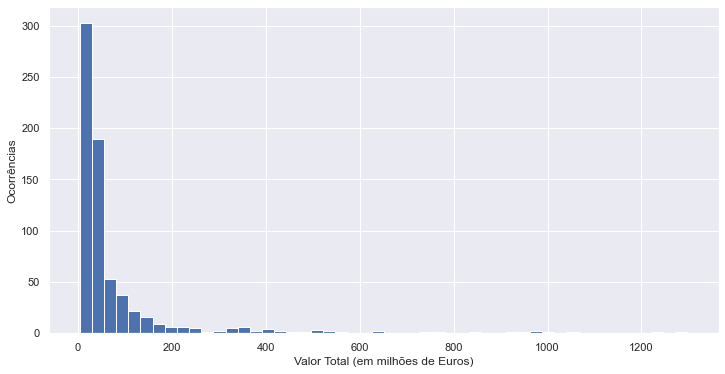

In [6]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_xlabel('Valor Total (em milhões de Euros)')
ax.set_ylabel('Ocorrências')
ax.hist(clubs['value_eur'], bins = 50);

In [7]:
leagues = data.groupby(['league_name']).aggregate({
    'age': 'mean',
    'wage_eur': 'sum',
    'value_eur': lambda x: sum(x) / 1e+6
}).sort_values('wage_eur', ascending = False)

leagues.head(5)

,age,wage_eur,value_eur
league_name,,,
English Premier League,24.549080,33152700.0,9148.980
Spain Primera Division,25.562401,19704550.0,7282.200
Italian Serie A,26.003552,17455550.0,5308.695
German 1. Bundesliga,24.439201,13448650.0,4763.380
French Ligue 1,24.344887,12384000.0,4239.495


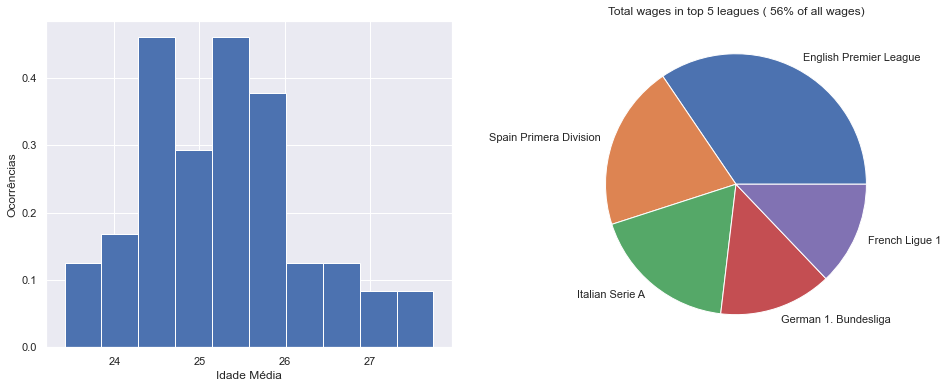

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))

axes[0].set_xlabel('Idade Média')
axes[0].set_ylabel('Ocorrências')
axes[0].hist(leagues['age'], bins = 10, density = True);

axes[1].pie(leagues['wage_eur'].head(5), labels = leagues.head(5).index)
percentage = leagues['wage_eur'].head(5).sum() / leagues['wage_eur'].sum()
axes[1].set_title(f'Total wages in top 5 leagues ({percentage * 100: .0f}% of all wages)');

## Pivot e heatmap

In [9]:
wage_per_age_overall = data.pivot_table(
    values = 'wage_eur', 
    index = 'age', 
    columns = 'overall', 
    aggfunc = lambda x: np.mean(x) / 1000
)
wage_per_age_overall.head(5)

overall,47,48,49,50,51,52,53,54,55,56,...,84,85,86,87,88,89,90,91,92,93
age,,,,,,,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,0.500000,0.500000,0.500000,0.500000,0.525000,1.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,0.50,0.500000,0.500000,0.500000,0.500000,0.500000,0.525000,0.520833,0.518000,0.537500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0.50,0.500000,0.520833,0.533333,0.776923,0.710465,0.674390,0.629825,0.698113,0.702500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,0.56,0.562500,0.618182,0.719444,1.096429,0.929412,1.035577,1.144615,0.981159,1.143860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1.00,1.269231,0.967857,0.862500,1.122917,1.263636,1.481944,1.170930,1.260156,1.461905,...,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN


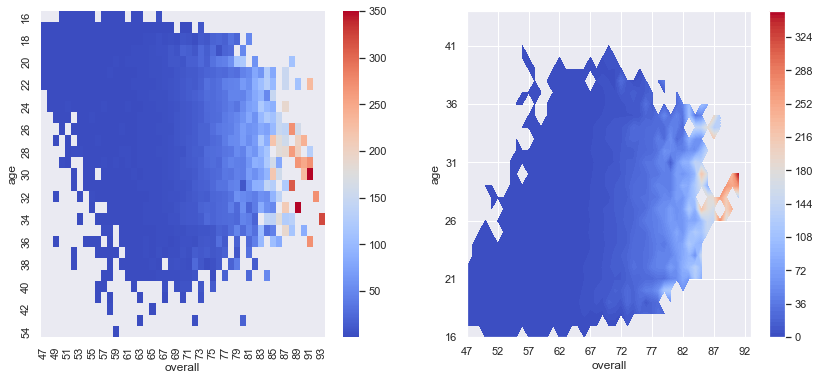

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (14,6))

sns.heatmap(wage_per_age_overall, ax = axes[0], cmap = 'coolwarm')

axes[1].set_xlabel('overall')
axes[1].set_ylabel('age')

axes[1].set_xticks(range(wage_per_age_overall.shape[1])[::5], wage_per_age_overall.columns[::5])
axes[1].set_yticks(range(wage_per_age_overall.shape[0])[::5], wage_per_age_overall.index[::5])

im1 = axes[1].contourf(wage_per_age_overall, levels = 100, cmap = 'coolwarm')
fig.colorbar(im1)

## Concatenação + pivot

In [11]:
def read_data(year):
    df = pd.read_csv(f'data/players_{year}.csv')
    df['year'] = 2000 + year
    return df

all_years = pd.concat([
    read_data(i)
    for i in range(15, 23)
])

all_years.reset_index(drop=True, inplace=True)

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_13124\4144543263.py:2: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/players_{year}.csv')
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_13124\4144543263.py:2: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/players_{year}.csv')
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_13124\4144543263.py:2: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/players_{year}.csv')
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_13124\4144543263.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/players_{year}.csv')


In [12]:
all_years.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2015
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,2015
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png,2015
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png,2015
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png,2015


In [13]:
all_years.query("short_name.str.startswith('Neymar')")

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year
29,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,LW,86,91,31000000.0,210000.0,22,...,45+3,45+3,55+3,16+3,https://cdn.sofifa.net/players/190/871/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png,2015
16165,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,LW,88,93,71500000.0,240000.0,23,...,45+3,45+3,58+3,19+3,https://cdn.sofifa.net/players/190/871/16_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png,2016
31782,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,LW,92,95,109000000.0,450000.0,24,...,46+4,46+4,58+4,20+4,https://cdn.sofifa.net/players/190/871/17_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png,2017
49378,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,LW,92,94,123000000.0,275000.0,25,...,46+4,46+4,59+4,20+4,https://cdn.sofifa.net/players/190/871/18_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png,2018
67330,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,LW,92,93,118500000.0,300000.0,26,...,47+7,47+7,61+7,20+7,https://cdn.sofifa.net/players/190/871/19_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png,2019
85415,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",92,92,105500000.0,290000.0,27,...,47+6,47+6,61+6,20+6,https://cdn.sofifa.net/players/190/871/20_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png,2020
103899,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png,2021
122843,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png,2022


In [14]:
nmr = all_years.query(
    "short_name.str.endswith('Messi')\
    or short_name == 'Cristiano Ronaldo'\
    or short_name.str.startswith('Neymar')"
)
nmr_pivot = nmr.pivot_table(index = 'year', columns = 'long_name', values='overall')
nmr_pivot

long_name,Cristiano Ronaldo dos Santos Aveiro,Lionel Andrés Messi Cuccittini,Neymar da Silva Santos Júnior
year,,,
2015,92,93,86
2016,93,94,88
2017,94,93,92
2018,94,93,92
2019,94,94,92
2020,93,94,92
2021,92,93,91
2022,91,93,91


<AxesSubplot:xlabel='year'>

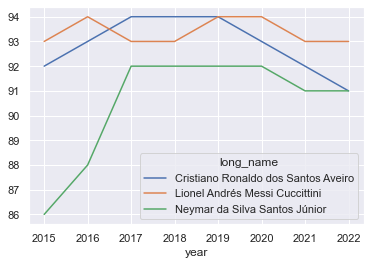

In [15]:
nmr_pivot.plot()

<AxesSubplot:xlabel='year', ylabel='overall'>

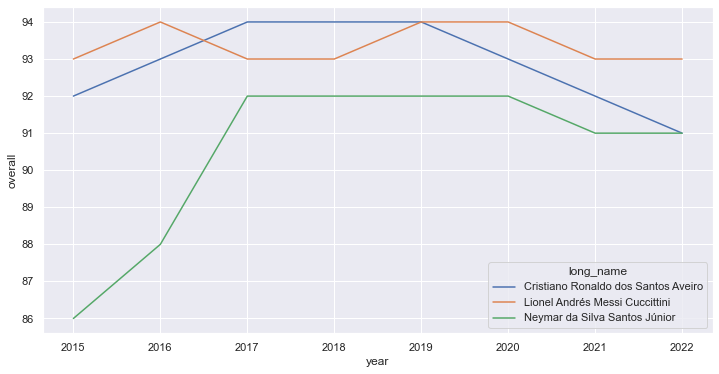

In [16]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_ylabel('overall')
nmr_pivot.plot(ax = ax)

# Gráficos estatísticos

## Seaborn

<AxesSubplot:xlabel='age', ylabel='overall'>

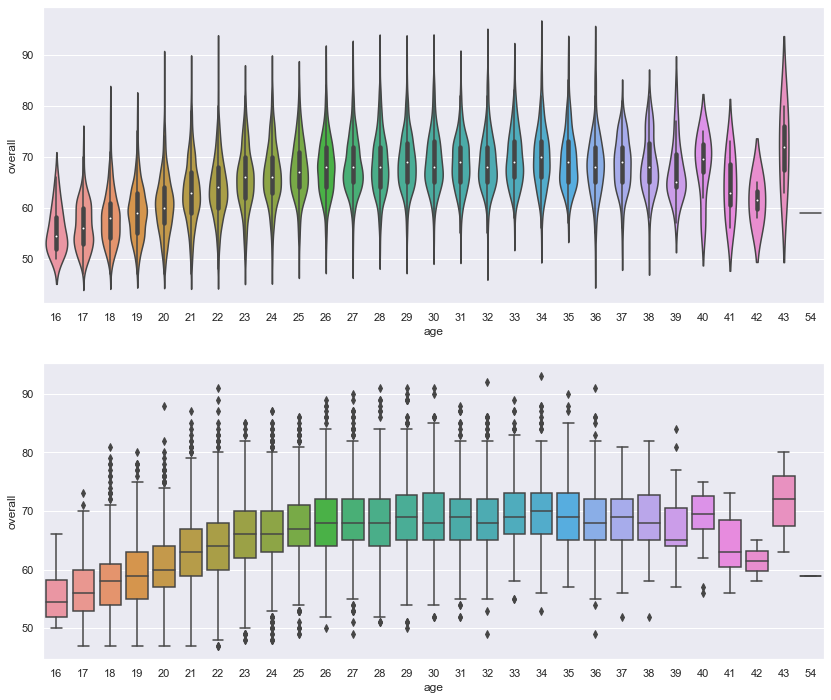

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

sns.violinplot(data=data, x='age', y='overall', ax = axes[0])

sns.boxplot(data=data, x='age', y='overall', ax = axes[1])

## Matplotlib

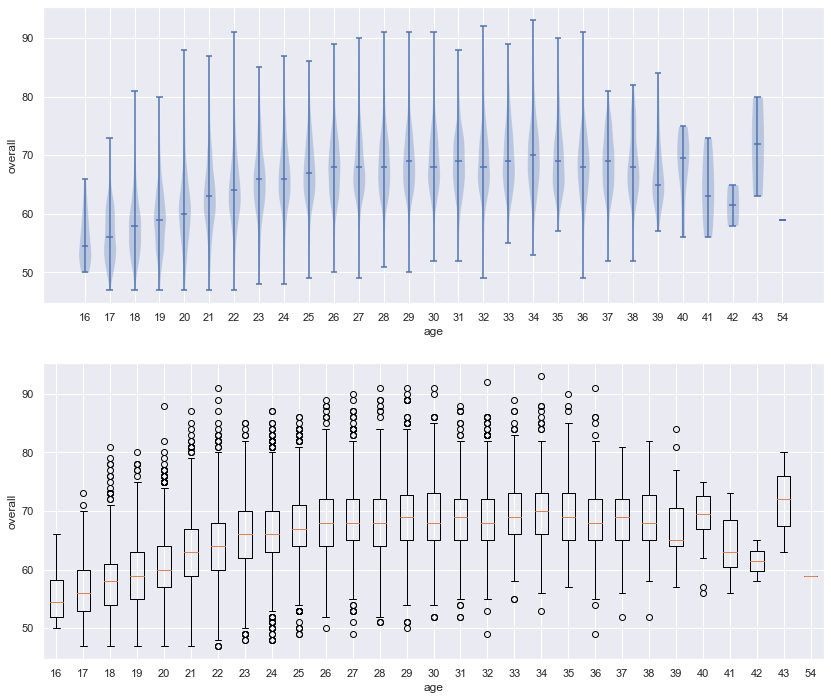

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ages_overall = data.groupby('age').aggregate({'overall': list})

# plot violin plot
axes[0].violinplot(ages_overall['overall'],
                  showmeans=False,
                  showmedians=True)

# plot box plot
axes[1].boxplot(ages_overall['overall'])

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks(range(1, ages_overall.shape[0]+1), ages_overall.index)
    ax.set_xlabel('age')
    ax.set_ylabel('overall')

# ipywidgets

In [19]:
ipywidgets.widgets.Dropdown(options = [1, 2, 3])

Dropdown(options=(1, 2, 3), value=1)

In [20]:
ipywidgets.widgets.IntText()

IntText(value=0)

In [21]:
def gera_violin(x, y):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.violinplot(data=data, x=x, y=y, ax = ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

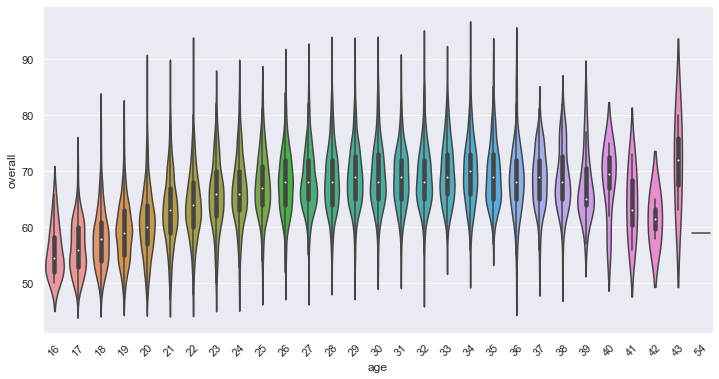

In [22]:
gera_violin('age', 'overall')

In [23]:
ipywidgets.interact(
    gera_violin,
    x = ipywidgets.widgets.Dropdown(options = data.columns[5:]),
    y = ipywidgets.widgets.Dropdown(options = data.columns[5:])
);

interactive(children=(Dropdown(description='x', options=('overall', 'potential', 'value_eur', 'wage_eur', 'age…

# Outras bibliotecas

In [24]:
positions_coordinates = {
    'ls':  [0.93, 0.30],
    'st':  [0.93, 0.50],
    'rs':  [0.93, 0.70],
    'lw':  [0.83, 0.10],
    'lf':  [0.88, 0.25],
    'cf':  [0.88, 0.50],
    'rf':  [0.88, 0.75],
    'rw':  [0.83, 0.90],
    'lam': [0.73, 0.30],
    'cam': [0.73, 0.50],
    'ram': [0.73, 0.70],
    'lm':  [0.58, 0.10],
    'lcm': [0.53, 0.30],
    'cm':  [0.53, 0.50],
    'rcm': [0.53, 0.70],
    'rm':  [0.58, 0.90],
    'lwb': [0.38, 0.10],
    'ldm': [0.33, 0.30],
    'cdm': [0.33, 0.50],
    'rdm': [0.33, 0.70],
    'rwb': [0.38, 0.90],
    'lb':  [0.23, 0.10],
    'lcb': [0.18, 0.30],
    'cb':  [0.18, 0.50],
    'rcb': [0.18, 0.70],
    'rb':  [0.23, 0.90],
    'gk':  [0.08, 0.50]
}

positions_coordinates = {i: [positions_coordinates[i][0] + 0.03, positions_coordinates[i][1]] for i in positions_coordinates}

In [25]:
for i in positions_coordinates.keys():
    data[i] = data[i].map(eval)

In [26]:
def sample_position(fixed = ['gk', 'rcb', 'lcb']):
    possible_positions = list(positions_coordinates.keys())
    for i in fixed:
        possible_positions.remove(i)
    np.random.shuffle(possible_positions)
    
    return fixed + possible_positions[:11 - len(fixed)]

def plot_formation(formation, names=None, annotate_kwargs={}, pitch_kwargs={}, positions_coordinates = positions_coordinates):
    pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True) 
    fig, ax = pitch.draw(**pitch_kwargs)

    dimensions = np.array([120, 80])
    
    if names == None:
        names = [i.upper() for i in formation]
    
    if 'ha' not in annotate_kwargs:
        annotate_kwargs['ha'] = 'center'
    if 'va' not in annotate_kwargs:
        annotate_kwargs['va'] = 'center'
    
    for i, j in zip(formation, names):
        pitch.annotate(j, positions_coordinates[i] * dimensions, ax=ax, bbox=dict(boxstyle='round', fc='w'), **annotate_kwargs)
    return fig, ax

def plot_club(club):
    annotate_kwargs = {'rotation': 10, 'fontsize': 12}
    pitch_kwargs = {'figsize': (16, 10)}
    aux = data.loc[
        (data['club_name'] == club) & (data['club_position'] != 'SUB') & (data['club_position'] != 'RES'), 
        ['club_position', 'short_name']
    ]
    positions = aux['club_position'].str.lower().values.tolist()
    players = aux['short_name'].values.tolist()
    
    fig, ax = plot_formation(positions, players, annotate_kwargs, pitch_kwargs)
    ax.set_title(club)
    return fig, ax

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

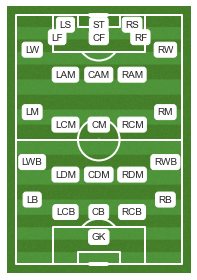

In [27]:
plot_formation(positions_coordinates)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

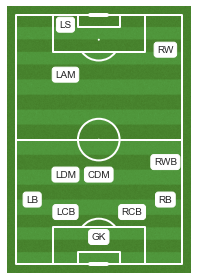

In [28]:
plot_formation(sample_position())

In [29]:
ipywidgets.interact(plot_club, club = ipywidgets.widgets.Dropdown(options = data['club_name'].unique()));

interactive(children=(Dropdown(description='club', options=('Paris Saint-Germain', 'FC Bayern München', 'Manch…